In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
print('x_train shape  : ', x_train.shape)
print('x_test shape   : ', x_test.shape)
print('y_train shape  : ', y_train.shape)
print('y_test shape   : ', y_test.shape)

x_train shape  :  (60000, 28, 28)
x_test shape   :  (10000, 28, 28)
y_train shape  :  (60000,)
y_test shape   :  (10000,)


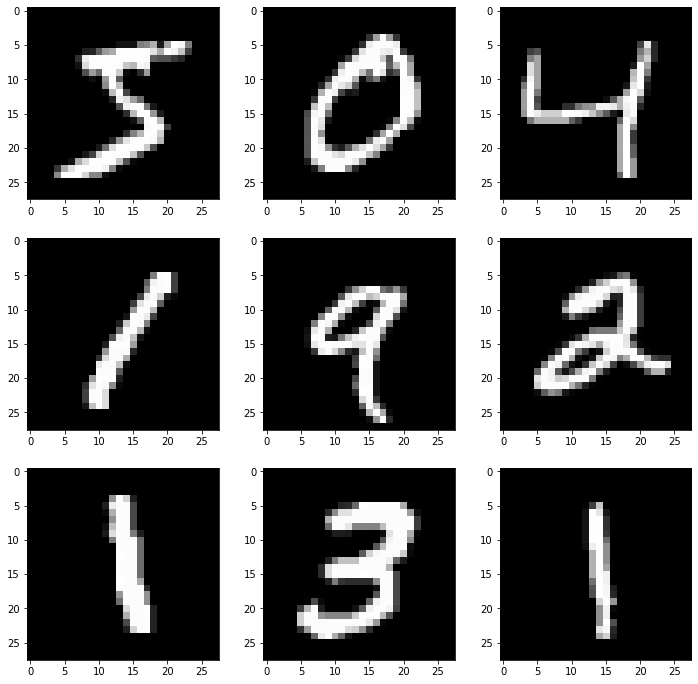

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for i in range(9):
	plt.subplot(330 + 1 +i)
	plt.imshow(x_train[i], cmap='gray')
plt.show()

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [6]:
print('x_train shape  : ', x_train.shape)
print('x_test shape   : ', x_test.shape)

x_train shape  :  (60000, 28, 28, 1)
x_test shape   :  (10000, 28, 28, 1)


In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.
x_test = x_test/255.

In [8]:
classes = len(np.unique(y_train))
classes

10

In [9]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = classes)
y_test = to_categorical(y_test, num_classes = classes)

In [10]:
from tensorflow.keras import layers
model = keras.Sequential()
model.add(keras.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(classes, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [11]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor="val_accuracy",),
]

In [12]:
batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
r = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=my_callbacks)

Epoch 1/15
469/469 [==============================] - 49s 103ms/step - loss: 0.3575 - accuracy: 0.8910 - val_loss: 0.0942 - val_accuracy: 0.9710
Epoch 2/15
469/469 [==============================] - 44s 93ms/step - loss: 0.1167 - accuracy: 0.9639 - val_loss: 0.0639 - val_accuracy: 0.9803
Epoch 3/15
469/469 [==============================] - 44s 94ms/step - loss: 0.0851 - accuracy: 0.9743 - val_loss: 0.0446 - val_accuracy: 0.9869
Epoch 4/15
469/469 [==============================] - 45s 95ms/step - loss: 0.0736 - accuracy: 0.9776 - val_loss: 0.0438 - val_accuracy: 0.9871
Epoch 5/15
469/469 [==============================] - 44s 94ms/step - loss: 0.0621 - accuracy: 0.9803 - val_loss: 0.0377 - val_accuracy: 0.9873
Epoch 6/15
469/469 [==============================] - 44s 94ms/step - loss: 0.0552 - accuracy: 0.9833 - val_loss: 0.0324 - val_accuracy: 0.9886
Epoch 7/15
469/469 [==============================] - 46s 98ms/step - loss: 0.0525 - accuracy: 0.9836 - val_loss: 0.0317 - val_accuracy

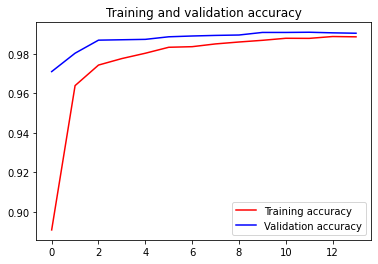

<Figure size 432x288 with 0 Axes>

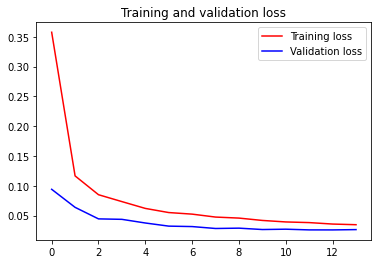

<Figure size 432x288 with 0 Axes>

In [13]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()
plt.show()

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026615548878908157
Test accuracy: 0.9904000163078308


In [17]:
model.save("model.h5")

In [ ]:
#from keras.models import load_model
#model = load_model('model.h5')

In [18]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>